<a href="https://www.kaggle.com/code/skanderadamafi/optimization-project-m2-iasd?scriptVersionId=296800668" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Projet Optimization des données**


# 1. Travaux Pratiques

**1.1. La descente du gradient**

*1.1.1. Cas de fonction quadratique:*

Avant de commencer, on rappelle que:

- $ \mathbf{w}^* \in \mathrm{argmin}_{\mathbf{w} \in \mathbb{R}^d} f(\mathbf{w})
    \quad \Leftrightarrow \quad
    \nabla f(\mathbf{w}^*) = \mathbf{0}
  $
- Toute fonction fortement convexe indique une unique solution.
- f(0) = 0 car $\nabla f(\mathbf{0}) = \mathbf{C}\mathbf{0} = \mathbf{0}$

Dans ce cas, on étudie le cas d'un problème fortement quadratique et convexe:

$$
    \mathrm{minimiser}_{\mathbf{w} \in \mathbb{R}^d} f(\mathbf{w}):=\tfrac{1}{2}\mathbf{w}^T \mathbf{C} \mathbf{w},
$$

On définit d'abord la matrice C en contruisant une matrice diagonale D avec des coefficients diagonaux tels que 0 < μ ≤ L, pour pouvoir conclure que cette matrice est strictement positive ($ \mathbf{C} \succeq \mu \mathbf{I} $), d'où le problème défini.

On construit ensuite l'algorithme en initialisant toutes les valeurs nécessaires, puis en mettant en place la fonction objective actuelle, pour répondre à la question suivante: "À quel point la solution w est-elle adéquate?" pour une itération k.

La valeur objective est ensuite stockée à travers la méthode "append". Le gradient g est calculé ensuite pour pouvoir être utilisé pour la boucle principale: le calcul de la taille de pas (w[:] = w - stepsize * g) pour en déduire le nouveau gradient et la nouvelle valeur de l'objectif à stocker.

À partir de cet algortithme, une série de tests est mise en place pour vérifier la convergence linéaire; il faut choisir une taille de pas qui n'est ni trop petit (convergence trop lente), ni trop grande (divergence).

1.1.2. **E**mpire **R**isk **M**inimization:

Après avoir géneré les données, on étudie deux cas importants:

- La régression linéaire, soit le problème convexe des moindres carrés: $
    \mathrm{minimiser}_{\mathbf{w} \in \mathbb{R}^d} f(\mathbf{w})
    := \frac{1}{2 n} \|\mathbf{X} \mathbf{w} - \mathbf{y}\|^2 + \frac{\lambda}{2}\|\mathbf{w}\|^2.
$

_ La régression logistique, soit la classification binaire convexe: $
    \mathrm{minimiser}_{\mathbf{w} \in \mathbb{R}^d} f(\mathbf{w})
    := \frac{1}{n} \sum_{i=1}^n f_i(\mathbf{w}), \qquad
    f_i(\mathbf{w})=\log(1+\exp(-y_i \mathbf{x}_i^T \mathbf{w}))+\frac{\lambda}{2}\|\mathbf{w}\|^2.
$

On crée ensuite une classe Python pour tout problème de regression qui définit les fonctions et paramètres nécessaires pour les cas de régression, puis on génère des deux instances avec des coefficients pour chaque solution: "pblinreg" pour la régression linéaire et "pblogreg" pour la régression logistique. On compare ensuite à une solution presque optimale (L-BFGS). On utilise ensuite un code similaire à celui d'en haut pour évoluer la descente du gradient et, à travers des visualizations, compare l'évolution; en changeant la formule à chaque reprise, on évolue la convergence et remarque qu'à partir d'un certain nombre d'itérations, les variantes à tailles de pas deviennent de plus en plus performantes. On en fait pour les cas de régression linéaire et logistiques.

*1.1.2. Le gradient stochiastique:*

Dans le même cadre du premier TP, on met en place une implémentation d'une classe Python pour les régressions linéaires et logistiques après avoir géneré les données nécessaires, avant de L-BGFS-B pour résoudre les problèmes.

Le gradient stochiastique $(
    \mathbf{w}_{k+1} = \mathbf{w}_k - \alpha_k \nabla f_{i_k}(\mathbf{w}_k))
$ se différencie du gradient de descente avec l'utilisation d'une époque, une unité de coût pour $n$ accès aux données à $n$ éléments à travers un budget fixé. Pour un élément $n_b$, une époque effectuera $\tfrac{n}{n_b}$ itérations.

En implémentant la descente du gradient stochiasque pour $\alpha_k=\tfrac{1}{L}$ (constante) et $\alpha_k=\frac{\alpha_0}{(k+1)^t}$, (avec $\alpha_0$ et $t>0$ (décroissante)), on remarque qu'elle est aléatoire; choisir une taille de pas décroissante revient à constater une diminution sous la forme de la courbe rouge, avec des oscillations qui n'améliorent pas la valeur moyenne. Même la taille de pas normale produit une mesure plus éloignée que la valeur moyenne. Dans les deux cas, on remarque que la descente du gradient normale reste une meilleure solution.

Il faut donc calibrer certains paramètres, et on peut faire de nombreuses observations:
- On implémente donc un code pour une descente de gradient stochiasque normale qui, de 1 à 0.0001, offre une visualisation de la descente stochiasque du gradient de pas/*learning rate* pour chaque mesure; plus la choix est petite, plus on obtiendra une convergence plus lente mais proche, et une grande choix emmène à une divergence de paramètres. On en remarque un cas similaire pour la descente décroissante.
- On s'intéresse ensuite aux tailles de fournées/*batch size* pour chaque descente stochiasque de 1 à n, et on implémente un code pour visualiser la courbe pour chaque taille choisie; la plus petite (1) cause trop de bruit, alors qu'une taille n représente une descente similaire à celle du gradient. Un compromis existe entre la vitesse et la stabilité. On peut également réduire la variance sur plusieurs exécutions par l'approche par fournées en implémentant un code de dix excéutions sur des tailles choisies; on obtient alors un résultat plus moyennant suite à des comparaisons sur plusieurs exécutions; on peut alors réduire le bruit sans perdre de vitesse.

Il existe également des variantes plus avancées; la descente stochiastique par normalisation utlise RMSProp (corrige une explosion de pas) ou par Adagrad (adapte chaque pas), alors que celle par momentum est plus variable avec des ceux choisis par défaut.








# 2. Projet 2.2

1. Variables matricielles et optimisation

Q1:

a) Il s'agit d'un problème de moindres carrés; pour tout x différent de 0, il existe une solution unique pour cette fonction fortment convexe.

In [1]:
def closed_form_w(x, y):
    return (x @ y) / (x @ x)

b) Gradient descent:

In [2]:
import numpy as np

def gd_scalar(x, y, alpha=0.1, n_iter=100):
  w = 0.0
  n = len(x)
  losses = []

  for _ in range(n_iter):
    grad = (1/n) * np.dot(w*x - y, x)
    w -= alpha * grad
    loss = (1/(2*n))* np.linalg.norm(w*x - y)**2
    losses.append(loss)
  return w, losses


Closed form: -0.14418952869277107
GD: -0.14416390611001384


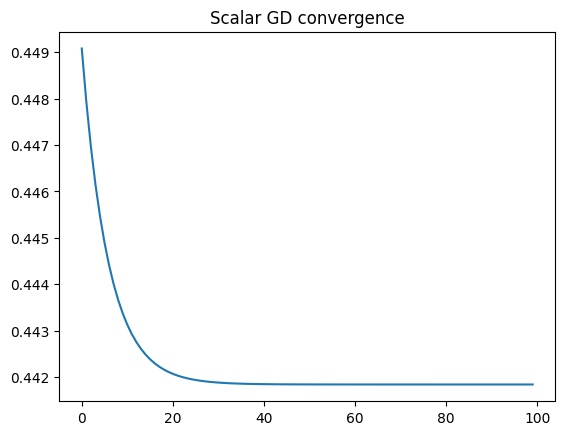

In [3]:
import matplotlib.pyplot as plt

np.random.seed(42)  # Replaced set_seed() with np.random.seed() for reproducibility
n = 100
x = np.random.randn(n)
y = np.random.randn(n)

w_star = closed_form_w(x, y)
w_gd, losses = gd_scalar(x, y)

print("Closed form:", w_star)
print("GD:", w_gd)

plt.plot(losses)
plt.title("Scalar GD convergence")
plt.show()

Q2:
a) Il existe toujours une matrice W such that Wx = y.

Donc, min f(w) = 0

b) Matrix Gradient Descent



In [4]:
def grad_W(W, x, y):
  n = len(x)
  error = W @ x - y
  return (1/n) * np.outer(error, x)  # Changed np.dot to np.outer for correct matrix gradient

def gd_scalar_matrix(x, y, alpha=0.1, n_iter=300):
  n = len(x)
  W = np.zeros((n,n))
  losses = []

  for _ in range(n_iter):
    W -= alpha * grad_W(W, x, y)
    loss = (1/(2*n))* np.linalg.norm(W @ x - y)**2
    losses.append(loss)
  return W, losses

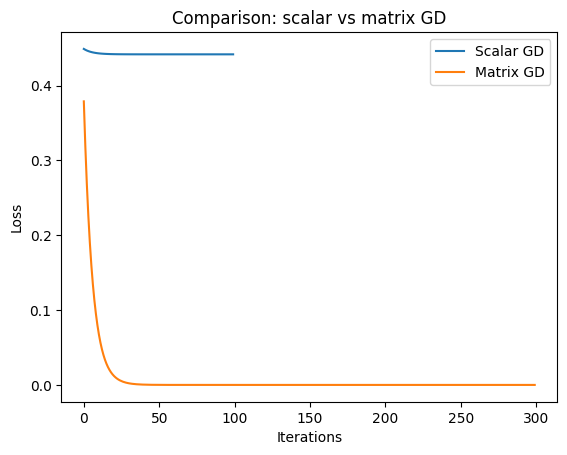

In [5]:
# Run scalar GD and get losses
w_gd_scalar, loss_scalar = gd_scalar(x, y)

# Run matrix GD and get losses
w_gd_matrix, loss_matrix = gd_scalar_matrix(x, y)

plt.plot(loss_scalar, label="Scalar GD")
plt.plot(loss_matrix, label="Matrix GD")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.title("Comparison: scalar vs matrix GD")
plt.show()

Dans les deux cas, la descente du gradient converge, mais la solution depend de l'initalization des valeurs.

2. Factorisation matricielle

In [6]:
# Q3: Generation of a matrix

np.random.seed(42)  # Assuming a seed for reproducibility
n1, n2 = 10, 20
x = np.random.randn(n1)
z = np.random.randn(n2)
X = np.outer(x, z)

def gd_rank_1(X, alpha=0.01, n_iter=500):
  n1, n2 = X.shape
  u = np.random.randn(n1)
  v = np.random.randn(n2)
  losses = []

  for _ in range(n_iter):
    R = np.outer(u, v) - X
    grad_u = R @ v
    grad_v = R.T @ u

    u = u - alpha * grad_u
    v = v - alpha * grad_v

    loss = 0.5 * np.linalg.norm(R, 'fro')**2
    losses.append(loss)

  return u, v, losses

def sgd_rank_1(X, alpha=0.01, n_iter=500, batch_size=10):
    n1, n2 = X.shape
    u = np.random.randn(n1)
    v = np.random.randn(n2)
    losses = []

    indices = [(i, j) for i in range(n1) for j in range(n2)]

    for _ in range(n_iter):
        batch = np.random.choice(len(indices), batch_size, replace=False)

        for idx in batch:
            i, j = indices[idx]
            err = u[i]*v[j] - X[i, j]
            u[i] -= alpha * err * v[j]
            v[j] -= alpha * err * u[i]

        loss = 0.5 * np.linalg.norm(np.outer(u, v) - X, 'fro')**2
        losses.append(loss)

    return u, v, losses



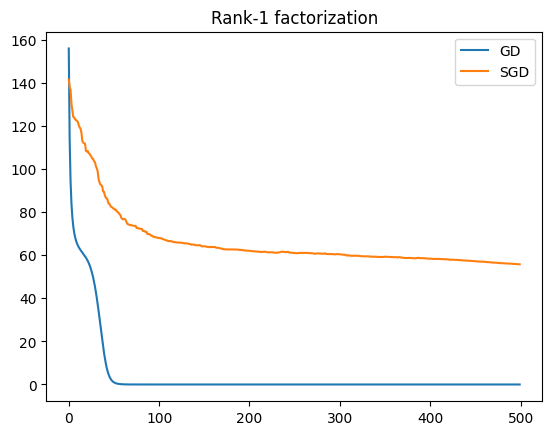

In [7]:
u1, v1, losses1 = gd_rank_1(X)
u2, v2, losses2 = sgd_rank_1(X, batch_size=10)

plt.plot(losses1, label="GD")
plt.plot(losses2, label="SGD")
plt.legend()
plt.title("Rank-1 factorization")
plt.show()

La descente du gradient stochiasque est plus bruyant que celle de descente normale, mais elle est plus rapide.

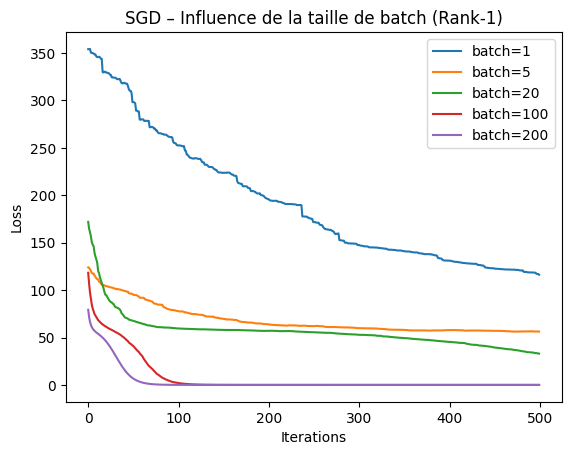

In [8]:
batch_sizes = [1, 5, 20, 100, 200]
results = {}

for b in batch_sizes:
    results[b] = sgd_rank_1(X, batch_size=b)

for b, (u_val, v_val, actual_losses) in results.items():  # Unpack the tuple here
    plt.plot(actual_losses, label=f"batch={b}")

plt.title("SGD – Influence de la taille de batch (Rank-1)")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

- Un batch de taille 1 est trop petit et donc sensible au bruit.
- Un batch de taille 200 est trop lent pour une bonne convergence.

In [9]:
# Q4: Multiple possible values

def gd_rank_r(X, r, alpha=0.01, n_iter=500):
    n1, n2 = X.shape
    U = np.random.randn(n1, r)
    V = np.random.randn(n2, r)
    losses = []

    for _ in range(n_iter):
        R = U @ V.T - X
        U -= alpha * (R @ V)
        V -= alpha * (R.T @ U)

        loss = 0.5 * np.linalg.norm(R, 'fro')**2
        losses.append(loss)

    return U, V, losses

def sgd_rank_r(X, r, alpha=0.01, n_iter=300, batch_size=20):
    n1, n2 = X.shape
    U = np.random.randn(n1, r)
    V = np.random.randn(n2, r)
    losses = []

    indices = [(i, j) for i in range(n1) for j in range(n2)]

    for _ in range(n_iter):
        batch = np.random.choice(len(indices), batch_size, replace=False)

        for idx in batch:
            i, j = indices[idx]
            err = U[i, :] @ V[j, :].T - X[i, j]
            U[i, :] -= alpha * err * V[j, :]
            V[j, :] -= alpha * err * U[i, :]

        losses.append(0.5 * np.linalg.norm(U @ V.T - X, 'fro')**2)

    return losses

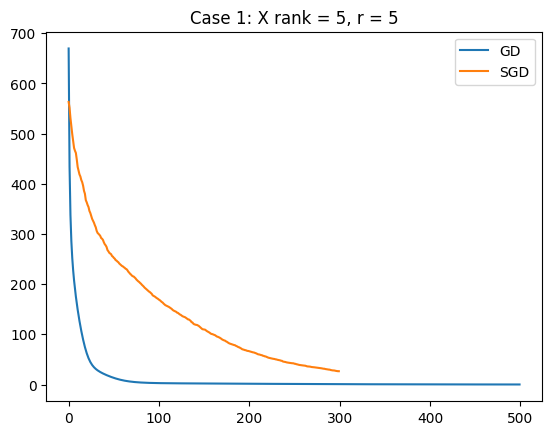

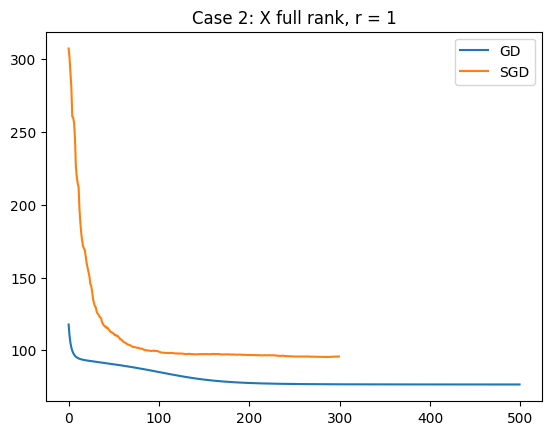

In [10]:
r = 5
A = np.random.randn(n1, r)
B = np.random.randn(n2, r)
X_rank5 = A @ B.T

U_gd, V_gd, loss_gd_1 = gd_rank_r(X_rank5, r)
loss_sgd_1 = sgd_rank_r(X_rank5, r)

plt.plot(loss_gd_1, label="GD")
plt.plot(loss_sgd_1, label="SGD")
plt.title("Case 1: X rank = 5, r = 5")
plt.legend()
plt.show()

X_full = np.random.randn(n1, n2)
r = 1

U_gd_2, V_gd_2, loss_gd_2 = gd_rank_r(X_full, r)  # Unpack the return values
loss_sgd_2 = sgd_rank_r(X_full, r)

plt.plot(loss_gd_2, label="GD")
plt.plot(loss_sgd_2, label="SGD")
plt.title("Case 2: X full rank, r = 1")
plt.legend()
plt.show()

Le premier graphe est une reconstruction pour un rang r, mais le deuxième souligne un problème d'approximation pour la capacité du modèle.

In [11]:
# Q5

def gd_rank_r_reg(X, r, lam=0.1, alpha=0.01, n_iter=500):
    n1, n2 = X.shape
    U = np.random.randn(n1, r)
    V = np.random.randn(n2, r)
    losses = []

    for _ in range(n_iter):
        R = U @ V.T - X
        grad_U = R @ V + lam * U
        grad_V = R.T @ U + lam * V
        U -= alpha * grad_U
        V -= alpha * grad_V

        loss = 0.5 * np.linalg.norm(R, 'fro')**2 + 0.5 * lam * (np.linalg.norm(U, 'fro')**2 + np.linalg.norm(V, 'fro')**2)
        losses.append(loss)

    return U, V, losses

def sgd_rank_r_reg(X, r, lam=0.1, alpha=0.01, n_iter=500,  batch_size=20):
    n1, n2 = X.shape
    U = np.random.randn(n1, r)
    V = np.random.randn(n2, r)
    losses = []

    indices = [(i, j) for i in range(n1) for j in range(n2)]

    for _ in range(n_iter):
      batch = np.random.choice(len(indices), batch_size, replace=False)

      for idx in batch:
        i, j = indices[idx]
        err = U[i] @ V[j] - X[i, j]
        U[i] -= alpha * (err * V[j] + lam * U[i])
        V[j] -= alpha * (err * U[i] + lam * V[j])

        R = U @ V.T - X
        losses.append(0.5 * np.linalg.norm(R, 'fro')**2)

    return U, V, losses


In [12]:
# Q5.ii

np.random.seed(0)
n1, n2 = 10, 20
r = 5

x = np.random.randn(n1)
z = np.random.randn(n2)
eps = 0.1 * np.random.randn(n1, n2)

X = np.outer(x, z) + eps

In [13]:
lambdas = [0, 0.01, 0.1, 1, 10]

for lam in lambdas:
    U, V, _ = gd_rank_r_reg(X, r=r, lam=lam)
    S = np.linalg.svd(U @ V.T, compute_uv=False)
    print(f"λ = {lam} → singular values:", np.round(S, 3))


λ = 0 → singular values: [19.604  0.39   0.339  0.28   0.162  0.     0.     0.     0.     0.   ]
λ = 0.01 → singular values: [19.595  0.495  0.318  0.241  0.14   0.     0.     0.     0.     0.   ]
λ = 0.1 → singular values: [19.505  0.376  0.341  0.249  0.105  0.     0.     0.     0.     0.   ]
λ = 1 → singular values: [1.8604e+01 4.0000e-03 3.0000e-03 1.0000e-03 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
λ = 10 → singular values: [9.604 0.    0.    0.    0.    0.    0.    0.    0.    0.   ]


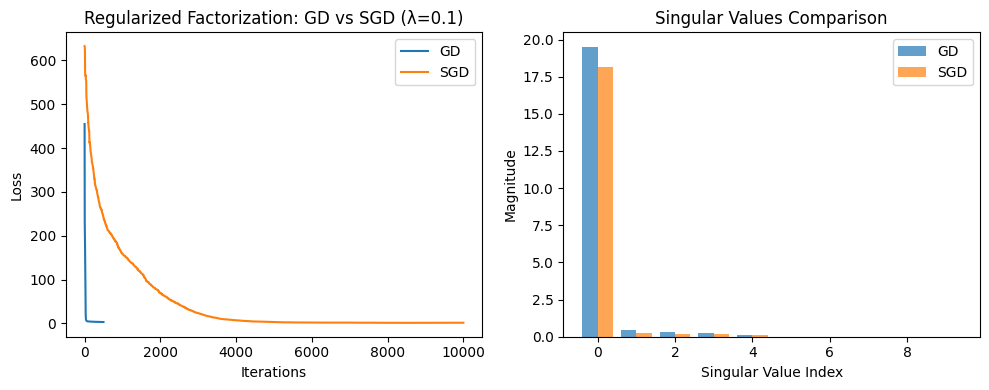

GD singular values: [19.508  0.449  0.343  0.274  0.115]
SGD singular values: [18.177  0.264  0.198  0.176  0.134]


In [14]:
# Compare GD vs SGD for regularized factorization (Q5.iv)
r_test = 5  # Use same r as Q5 setup
U_gd_reg, V_gd_reg, losses_gd = gd_rank_r_reg(X, r=r_test, lam=0.1)
U_sgd_reg, V_sgd_reg, losses_sgd = sgd_rank_r_reg(X, r=r_test, lam=0.1)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(losses_gd, label="GD")
plt.plot(losses_sgd, label="SGD")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.title("Regularized Factorization: GD vs SGD (λ=0.1)")

plt.subplot(1, 2, 2)
S_gd = np.linalg.svd(U_gd_reg @ V_gd_reg.T, compute_uv=False)
S_sgd = np.linalg.svd(U_sgd_reg @ V_sgd_reg.T, compute_uv=False)
plt.bar(np.arange(len(S_gd)) - 0.2, S_gd, width=0.4, label="GD", alpha=0.7)
plt.bar(np.arange(len(S_sgd)) + 0.2, S_sgd, width=0.4, label="SGD", alpha=0.7)
plt.xlabel("Singular Value Index")
plt.ylabel("Magnitude")
plt.legend()
plt.title("Singular Values Comparison")

plt.tight_layout()
plt.show()

print(f"GD singular values: {np.round(S_gd[:5], 3)}")
print(f"SGD singular values: {np.round(S_sgd[:5], 3)}")

iii) On peut obtenir un lambda de rang 1 qui serait la solution, mais cela engendrait un bruit de taille hepsilon et un biais, et il ne correspond donc pas necessairement à l'expression.

iv) Les conclusions restent identiques pur la descente du gradient et celle stochiasque, si toutefois ce dernier introduit une variance qui necessite une regularisation pour contrôler le rang effectif de la solution.


# 3. Projet 1: OML

In [15]:
import pandas as pd

# Load the delivery dataset
df = pd.read_csv("/kaggle/input/package-delivery-dataset/package_delivery_dataset.csv")
df.head()

,order_id,order_price,customer_lat,customer_lon,distance_to_customer_KM,delivery_fee,weight_in_gm
0,ORDC01406,140.80,12.9766,77.5993,8.335,13.700428,818.2
1,ORDZ10125,313.50,12.9770,77.5773,7.536,6.167473,960.0
2,ORDZ04175,714.00,12.9551,77.6593,9.860,15.088928,1255.5
3,ORDI03691,480.25,12.9473,77.5616,8.614,13.684368,757.5
4,ORDZ04094,497.75,12.9850,77.5533,8.802,13.760744,381.0


In [16]:
# Extract coordinates and demands

df = df.dropna()

customers = df[['customer_lat', 'customer_lon']].rename(
    columns={'customer_lat': 'y', 'customer_lon': 'x'}
)

customers = customers.reset_index(drop=True)
customers['demand'] = 1  # 1 package per customer (simple assumption)

# Define depot (warehouse/storage for data)

depot = {
    'x': customers.x.mean(),
    'y': customers.y.mean()
}


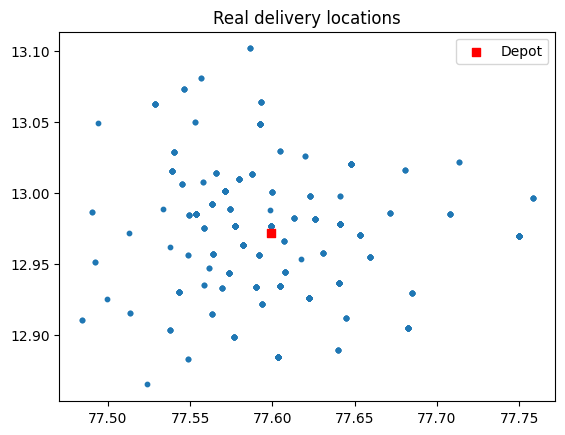

In [17]:
# Visualize real customer locations

plt.scatter(customers.x, customers.y, s=10)
plt.scatter(depot["x"], depot["y"], c="red", marker="s", label="Depot")
plt.legend()
plt.title("Real delivery locations")
plt.show()

In [18]:
# Compute distance matrix

from scipy.spatial.distance import cdist

coords = customers[['x', 'y']].values
distance_matrix = cdist(coords, coords)

depot_distances = cdist(coords, np.array([[depot["x"], depot["y"]]]))[0]

In [19]:
# Constraint definitions

N_CUSTOMERS = 1000
VEHICLE_CAPACITY = 5000

In [20]:
def nearest_neighbors(depot_distances, distance_matrix):
  unvisited = set(range(len(depot_distances)))
  route = []
  current = None

  while unvisited:
    if current is None:
      next = min(unvisited, key=lambda x: depot_distances[x])
    else :
      next = min(unvisited, key=lambda x: distance_matrix[current, x])
    route.append(next)
    unvisited.remove(next)
    current = next

  return route


In [21]:
route = nearest_neighbors(depot_distances, distance_matrix)

In [22]:
def split_routes(route, demands, vehicle_capacity):
  routes = []
  current_route = []
  current_capacity = 0

  for c in route:
    if current_capacity + demands[c] <= vehicle_capacity:
      current_route.append(c)
      current_capacity += demands[c]

    else:
      if current_route:
        routes.append(current_route)
      current_route = [c]
      current_capacity = demands[c]

  if current_route:
    routes.append(current_route)

  return routes

In [23]:
routes = split_routes(route, customers.demand.values, VEHICLE_CAPACITY)
print(f"Number of routes: {len(routes)}")

Number of routes: 1


In [24]:
def reduce_cost_route(route):
  cost = depot_distances[route[0]]
  for i in range(len(route)):
    cost += distance_matrix[route[i-1], route[i]]
  cost += depot_distances[route[-1]]
  return cost

total_cost = sum(reduce_cost_route(route) for route in routes)
print(f"Total cost: {total_cost}")

Total cost: 0.009684036026367535


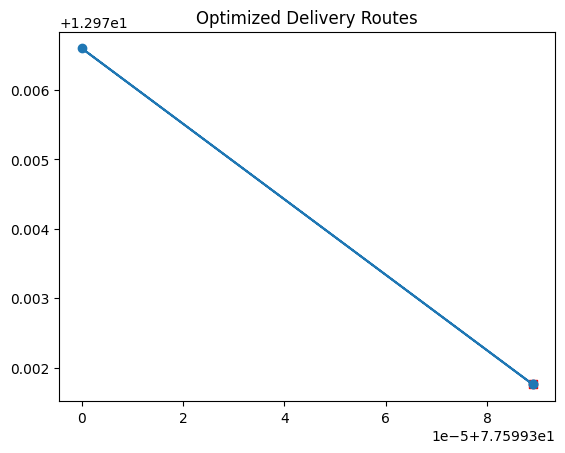

In [25]:
colors = plt.cm.tab10.colors

for i, r in enumerate(routes):
  xs = [depot["x"]] + [customers.x[c] for c in r] + [depot["x"]]
  ys = [depot["y"]] + [customers.y[c] for c in r] + [depot["y"]]
  plt.plot(xs, ys, color=colors[i % 10], marker="o")

plt.scatter(depot["x"], depot["y"], c="red", marker="s", label="Depot")
plt.title("Optimized Delivery Routes")
plt.show()
